# Challenge 3 - Yellow Taxi Journeys 2018-2020
> From 2018-2020, in which hour of the day window was there the most recorded demand for yellow taxis? <br>
> Which yellow taxi zones have the best tippers? <br>
> Can you show a choropleth for tipping? <br>
> For data that has been collected, has the COVID-19 outbreak impacted yellow taxi demand? <br>

In [0]:
%sql
SELECT * FROM taxi_journeys_sm LIMIT 10

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,idx
2,2001-01-01T00:02:26.000+0000,2001-01-01T00:04:49.000+0000,1,0.36,1,N,48,48,2,3.5,0.0,0.5,0.0,0.0,0.3,4.3,null,3
2,2001-01-05T11:45:23.000+0000,2001-01-05T11:52:05.000+0000,5,1.53,1,N,71,89,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8,null,10
2,2002-02-02T01:12:58.000+0000,2002-02-02T01:25:12.000+0000,1,1.56,1,N,142,246,2,9.5,0.0,0.5,0.0,0.0,0.3,12.8,2.5,17
2,2002-02-02T01:25:54.000+0000,2002-02-02T01:43:18.000+0000,1,3.39,1,N,158,230,2,15.5,0.0,0.5,0.0,0.0,0.3,18.8,2.5,19
2,2002-02-02T01:40:18.000+0000,2002-02-02T02:01:38.000+0000,1,0.82,1,N,48,230,2,11.5,0.0,0.5,0.0,0.0,0.3,14.8,2.5,23
2,2002-12-31T22:30:31.000+0000,2002-12-31T23:03:31.000+0000,1,0.0,1,N,7,193,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,null,26
2,2008-12-31T01:02:42.000+0000,2008-12-31T01:39:02.000+0000,1,4.82,1,N,230,246,1,24.5,0.5,0.5,0.0,0.0,0.3,25.8,null,68
2,2008-12-31T18:40:01.000+0000,2008-12-31T19:03:26.000+0000,2,2.12,1,N,246,229,1,14.5,1.0,0.5,3.26,0.0,0.3,19.56,null,163
2,2008-12-31T20:17:07.000+0000,2008-12-31T20:32:07.000+0000,5,1.64,1,N,234,211,1,10.5,0.5,0.5,2.2,0.0,0.3,14.0,null,171
2,2008-12-31T20:20:23.000+0000,2008-12-31T20:58:23.000+0000,1,26.73,4,N,138,265,1,93.0,0.5,0.5,18.86,0.0,0.3,113.16,null,172


In [0]:
spark.sql('select * from taxi_journeys_sm limit 10').toPandas().head()

Out[5]:

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,idx
0,2,2001-01-01 00:02:26,2001-01-01 00:04:49,1,0.36,1,N,48,48,2,3.5,0.0,0.5,0.0,0.0,0.3,4.3,NaN,3
1,2,2001-01-05 11:45:23,2001-01-05 11:52:05,5,1.53,1,N,71,89,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8,NaN,10
2,2,2002-02-02 01:12:58,2002-02-02 01:25:12,1,1.56,1,N,142,246,2,9.5,0.0,0.5,0.0,0.0,0.3,12.8,2.5,17
3,2,2002-02-02 01:25:54,2002-02-02 01:43:18,1,3.39,1,N,158,230,2,15.5,0.0,0.5,0.0,0.0,0.3,18.8,2.5,19
4,2,2002-02-02 01:40:18,2002-02-02 02:01:38,1,0.82,1,N,48,230,2,11.5,0.0,0.5,0.0,0.0,0.3,14.8,2.5,23


> From 2018-2020, in which hour of the day window was there the most recorded demand for yellow taxis? <br>

In [0]:
%sql
DROP TABLE IF EXISTS count_per_min

In [0]:
%sql 
CREATE TEMPORARY VIEW count_per_min AS (
  SELECT COUNT(1) as num, MINUTE(tpep_pickup_datetime) + 60 * HOUR(tpep_pickup_datetime) as minute_of_day
  FROM taxi_journeys_sm
  GROUP BY MINUTE(tpep_pickup_datetime) + 60 * HOUR(tpep_pickup_datetime)
)


In [0]:
%sql
SELECT * FROM count_per_min

num,minute_of_day
22114,1088
18543,1238
17628,1342
5058,148
14274,463
14953,471
15270,496
18321,833
18860,1025
21762,1084


In [0]:
%sql
DROP TABLE IF EXISTS frequency_over_hour

In [0]:
%sql
CREATE TEMPORARY VIEW frequency_over_hour AS (
  SELECT i.minute_of_day as window_start, SUM(o.num) as frequency
  FROM COUNT_PER_MIN i, COUNT_PER_MIN o
  WHERE o.minute_of_day >= i.minute_of_day AND o.minute_of_day <= i.minute_of_day + 60
  OR o.minute_of_day <= i.minute_of_day - (23 * 60)  -- considering 2300-2359
  GROUP BY i.minute_of_day
)

Out[6]:

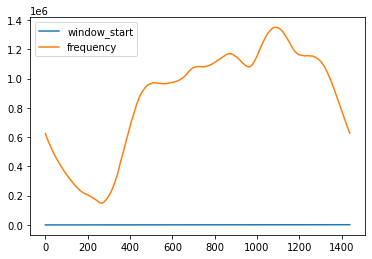

<matplotlib.axes._subplots.AxesSubplot at 0x7fedacf653a0>

In [0]:
freq_pd = spark.sql('select * from frequency_over_hour ORDER BY window_start').toPandas()
freq_pd.plot()

In [0]:
import math
busiest_start = spark.sql('select window_start from frequency_over_hour ORDER BY frequency DESC LIMIT 1').collect()[0][0]
'busiest start: {0}:{1}'.format(str(math.floor(busiest_start / 60)), str(busiest_start - math.floor(busiest_start / 60) * 60).zfill(2))

Out[7]: 'busiest start: 18:08'